In [2]:
import requests
import json

# Replace with your access token
access_token = "49c1affe7fd04c8aa5972714d2026619"

#Tag
tag = "car"

# Replace with the actual model UID
model_uid = ""

url = "https://api.sketchfab.com/v3/models"
query_params = {
    "sort_by": "viewCount",
    "tags": tag,
    "downloadable": "true",
    "archives_flavours": "false"
}

response = requests.get(url, params=query_params)


if response.status_code == 200:
    data = response.json()

# Number of models to download
n = 3
uids = []
names = []
for i in range(n):
    uids.append(data["results"][i]["uid"])
    names.append(data["results"][i]["name"])
urls = []
for uid in uids:
    print(uid)
    model_uid = uid
    # # API endpoint for download request
    url_dl = f"https://api.sketchfab.com/v3/models/{model_uid}/download"
    # # Make a GET request with the authorization header
    response = requests.get(url_dl, headers={"Authorization": f"Token {access_token}"})
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        download_data = json.loads(response.text)
        
        # Get the URL for the glTF file
        gltf_url = download_data["gltf"]["url"]

    else:
        # Print the error message
        print("Request failed:", response.text)
    urls.append(gltf_url)

ab6fb464b875404f93cd3646db7f70c6
dad6523c55d44b13ae1920cfead42a93
ccf28699af464f45b09a0326673e965b


c:\Users\paulr\Documents\Epita\PFEE\PipelineLego Car 3d model free Download
Download succeeded.
Unzipped Lego Car 3d model free Download


C:\Users\paulr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


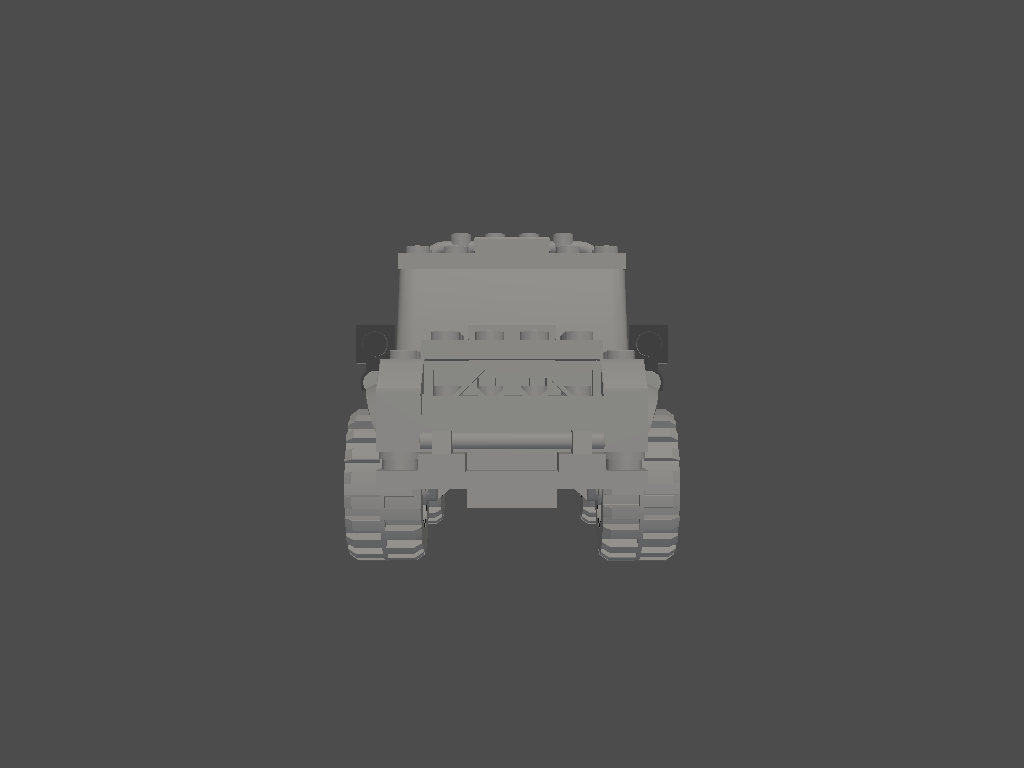

c:\Users\paulr\Documents\Epita\PFEE\PipelineLime-o-usine
Download succeeded.
Unzipped Lime-o-usine


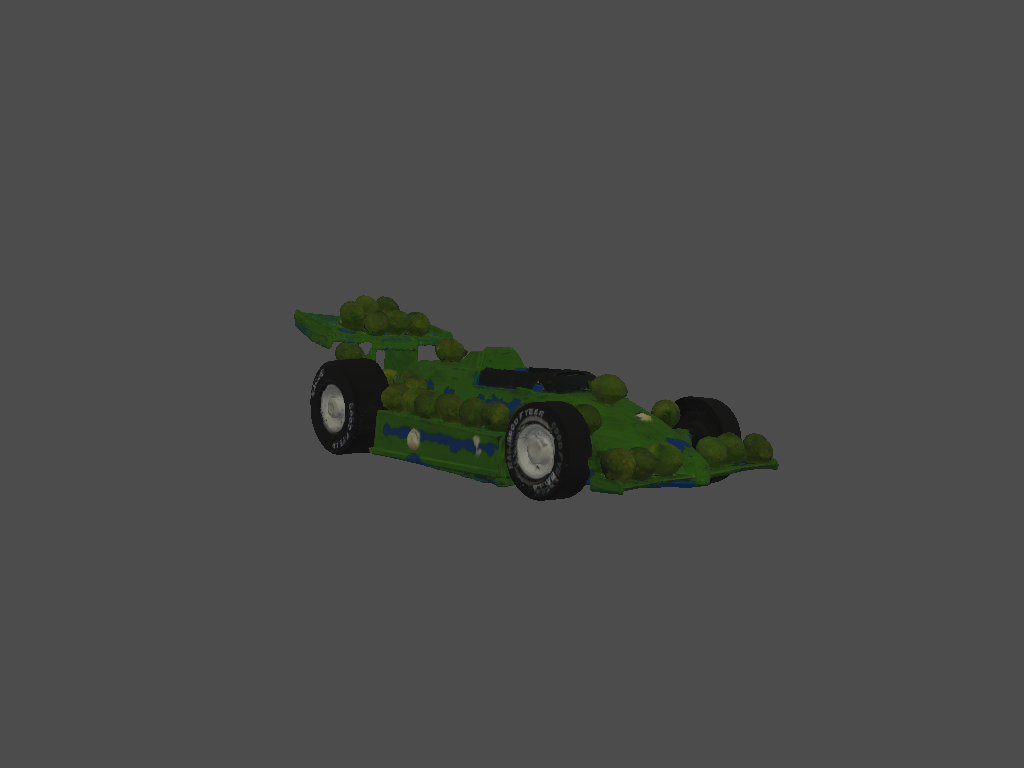

c:\Users\paulr\Documents\Epita\PFEE\PipelineCroc Car
Download succeeded.
Unzipped Croc Car


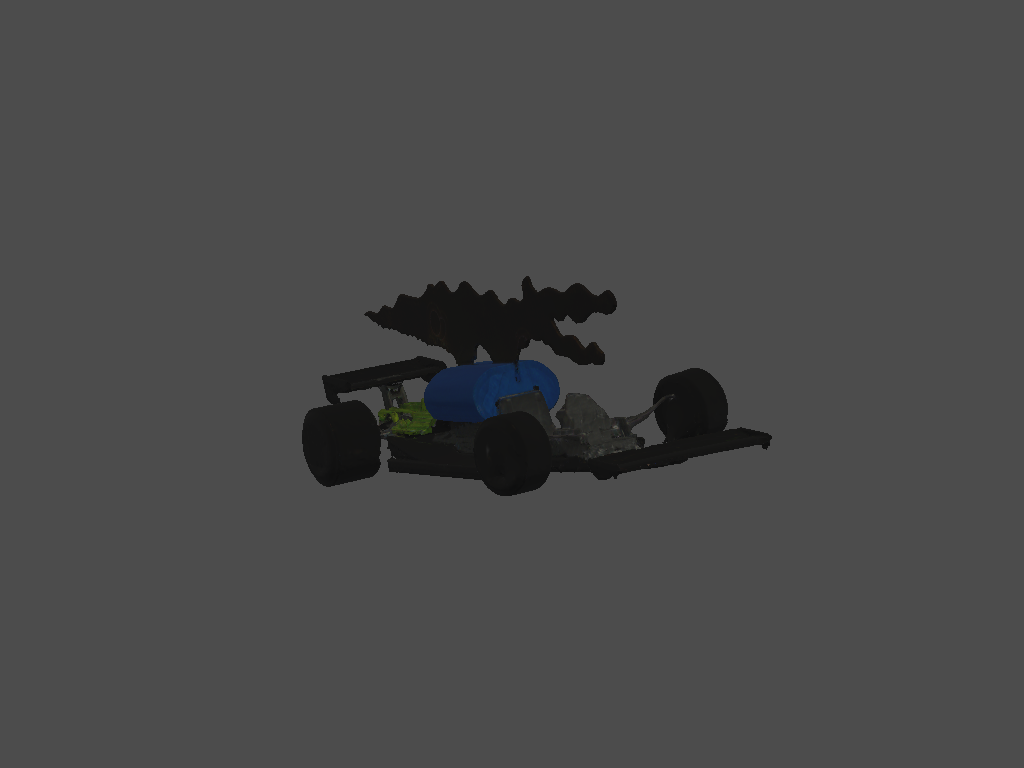

In [4]:
import zipfile
import pyvista as pv
import os

directory_name = "models"
parent_dir = os.getcwd()
path = os.path.join(parent_dir, directory_name)

if not os.path.exists(path):
    os.makedirs(path)

for i in range(n):
    name = names[i]
    PATH = f"models/{name}.zip"
    # Make a GET request to download the glTF file
    response = requests.get(urls[i])
    # Check if the request was successful
    if response.status_code == 200:
        # Save the response content to a file
        print(parent_dir + name)
        with open(PATH, "wb") as f:
            f.write(response.content)
        print("Download succeeded.")
        
        with zipfile.ZipFile((PATH), 'r') as zip_ref:
            model_folder = os.path.splitext(os.path.basename(PATH))[0]
            zip_ref.extractall("models/"+model_folder)
            print("Unzipped " + name)

        pl = pv.Plotter()
        pl.import_gltf(path + "/" + name + "/scene.gltf")
        pl.camera.zoom(1)
        pl.show()
        os.remove(PATH)
    else:
        # Print the error message
        print("Download failed:", response.text)